# Предобработка данных

В этом ноутбуке мы проанализируем пропуски и выбросы данных. И реализуем функции !!! для быстрой обработки данных.

Затем попробуем создать признаки на основе существующих. И реализуем функцию !!!.

Эти функции мы будем использовать для построения лучшей модели в !!! и !!!.

In [3]:
%load_ext autoreload
%autoreload 2

## Загрузка и обработка данных

In [4]:
# библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# мои файлы
from data_process import load_data
# from baseline_model import MeansModel

In [5]:
# загрузим данные
data = load_data() 

# добавим новые признаки
# data = format_features(data)

# создадим отдельно список всех объектов квартир 
# flats = union(data)

/Users/aksveronika/Desktop/Курсовая/data_process.py:18: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('/Users/aksveronika/Desktop/Курсовая/analogs_2023-05-31_2023-06-30.csv')


## Обработка пропусков 

Для начала нам надо составить датасет из всех квартир, так как у нас дублируются данные в квартирах и аналогах. 

In [6]:
a_columns = data.columns[(data.columns.str.startswith('a_')) & (~data.columns.str.startswith('a_actual_dt'))]
b_columns = data.columns[(data.columns.str.startswith('b_')) 
                            & (~data.columns.str.startswith('b_valid'))
                            ]
analogs = data.sort_values(by='b_valid_from', ascending=False).groupby('b_offer_id').head(1)

rename_dict = {}
for column in data.columns:
    rename_dict[column] = column[2:]

objects = data[a_columns].rename(columns=rename_dict).drop_duplicates(ignore_index=True)
analogs = analogs[b_columns].rename(columns=rename_dict).drop_duplicates(ignore_index=True)
flats = pd.concat([objects, analogs[~analogs.offer_id.isin(objects.offer_id)]]).drop_duplicates(ignore_index=True).sort_values('offer_id')
flats

,offer_id,n_photos,source,house_guid,house_lat,house_lon,floor,rooms,renovation,repair_class_id,...,flat_class_mean,is_apartment_mean,region,amenities,infrastructure,commission,deposit,haggle,communal_payments,price
23486,16309055,14,1,c9c6494b-9a71-40d9-8380-1353c967f7e6,55.762444,37.635593,5.0,4,3.0,5.0,...,3.90,0.11,Москва,NaN,NaN,NaN,NaN,NaN,NaN,380000.0
14066,109116854,10,1,84e36a92-15ed-4b4d-a392-ffc2721a66c6,55.738591,37.588584,5.0,2,4.0,5.0,...,3.32,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,225000.0
7877,109116931,8,1,38283aaa-240a-4b6b-a379-14d3b53d510f,55.755707,37.568857,6.0,4,4.0,4.0,...,3.32,0.02,Москва,NaN,NaN,NaN,NaN,NaN,NaN,230000.0
10894,109116936,13,1,d5dc065f-951a-4bb7-b356-21ef3c2b97ff,55.764577,37.595842,4.0,3,4.0,5.0,...,3.76,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,843249.0
57986,109116943,22,1,4d6472e4-bdd1-4bf3-b89d-a7a2a72222b2,55.747115,37.539078,65.0,3,4.0,5.0,...,2.63,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59548,1967759993,21,1,aafc00d3-48c6-4b1d-80c9-fbdea4e62090,55.812474,37.483903,8.0,2,2.0,4.0,...,2.94,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,94400.0
62731,1967779312,6,1,b8c585f3-cf89-45dd-89dc-ddb28b242242,60.036928,30.215365,7.0,1,NaN,4.0,...,2.35,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
65278,1967791286,9,1,f0928aa8-9194-4183-b268-bbfb0dd09585,55.710550,37.932935,12.0,2,3.0,4.0,...,2.36,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,3500.0
67476,1967812744,16,1,9a06bf40-8f2a-43db-b0aa-b3bade3e55a3,55.730887,37.751996,16.0,1,2.0,3.0,...,1.22,0.00,Москва,NaN,NaN,NaN,NaN,NaN,NaN,41900.0


In [7]:
flats.columns

Index(['offer_id', 'n_photos', 'source', 'house_guid', 'house_lat',
       'house_lon', 'floor', 'rooms', 'renovation', 'repair_class_id',
       'quality_class_id', 'quality', 'balconies', 'loggias', 'area_total',
       'living_area', 'kitchen_area', 'built_year_fillna_own',
       'built_year_fillna_sim_low', 'entrance_count', 'elevators_count',
       'floors_fillna_own', 'wall_material_fillna_own',
       'wall_material_fillna_sim_low', 'ceiling_height_fillna_own',
       'flat_class_mean', 'is_apartment_mean', 'region', 'amenities',
       'infrastructure', 'commission', 'deposit', 'haggle',
       'communal_payments', 'price'],
      dtype='object')

Посмотрим на все пропуски, которые у нас есть.

In [8]:
columns_with_missing_values = flats.columns[flats.isnull().any()]

# У каких признаков есть пропуски и сколько их
print(flats[columns_with_missing_values].isnull().sum())

renovation                      26087
repair_class_id                  9213
quality_class_id                 9213
quality                          9213
balconies                       37475
loggias                         58844
living_area                     16581
kitchen_area                     6667
built_year_fillna_own             588
built_year_fillna_sim_low           7
entrance_count                  27541
elevators_count                 27791
floors_fillna_own                   7
wall_material_fillna_own          100
wall_material_fillna_sim_low        7
ceiling_height_fillna_own         796
flat_class_mean                    89
is_apartment_mean                 583
amenities                       62270
infrastructure                  62284
commission                      63828
deposit                         63007
haggle                          63990
communal_payments               71494
dtype: int64


In [9]:
# Доля пропусков в каждом столбце
print(flats[columns_with_missing_values].isnull().mean() * 100)

renovation                       36.488377
repair_class_id                  12.886396
quality_class_id                 12.886396
quality                          12.886396
balconies                        52.416986
loggias                          82.306208
living_area                      23.192156
kitchen_area                      9.325258
built_year_fillna_own             0.822447
built_year_fillna_sim_low         0.009791
entrance_count                   38.522114
elevators_count                  38.871793
floors_fillna_own                 0.009791
wall_material_fillna_own          0.139872
wall_material_fillna_sim_low      0.009791
ceiling_height_fillna_own         1.113380
flat_class_mean                   0.124486
is_apartment_mean                 0.815453
amenities                        87.098218
infrastructure                   87.117800
commission                       89.277422
deposit                          88.129074
haggle                           89.504014
communal_pa

### Ремонт

Посмотрим на распределение признака ремонта

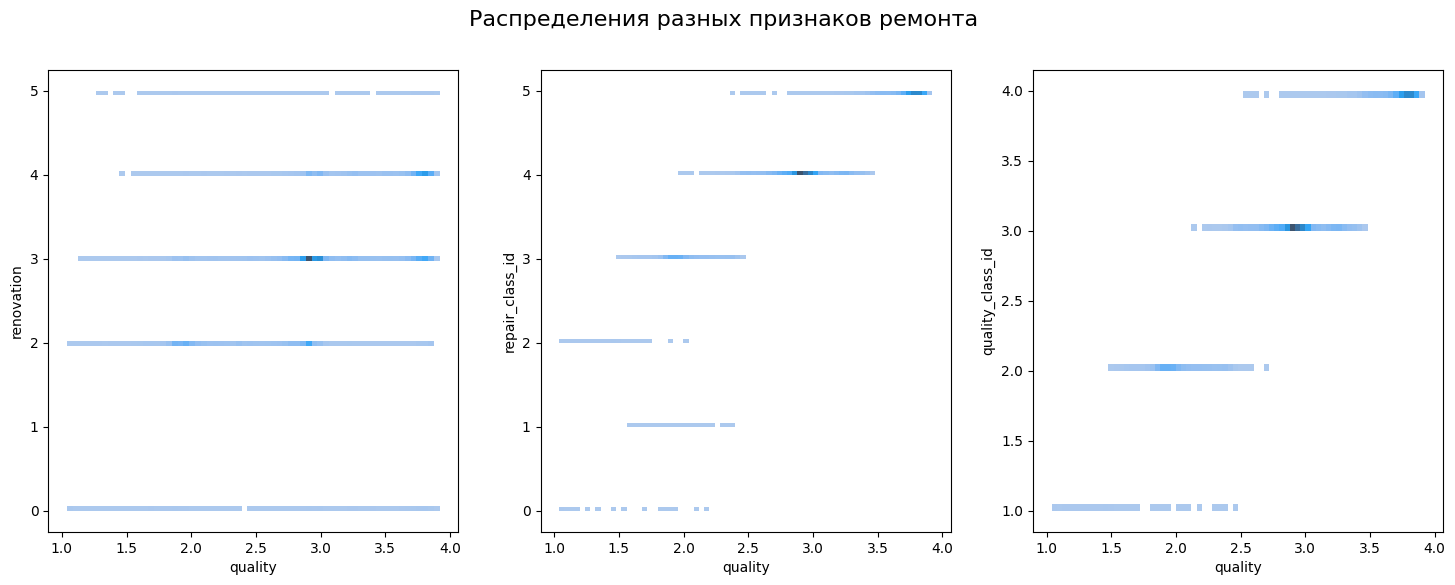

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(flats, x='quality', y='renovation', ax=axs[0])
sns.histplot(flats, x='quality', y='repair_class_id', ax=axs[1])
sns.histplot(flats, x='quality', y='quality_class_id', ax=axs[2])
fig.suptitle('Распределения разных признаков ремонта', fontsize=16)
plt.show()

Заметим, что a_renovation - ремонт из объявления имеет огромное количество пропусков, кроме того довольно плохо соответсвует оценки модели.

Поэтому для признака ремонта будем использовать оценки из модели ремонта: a_repair_class_id, a_quality_class_id, a_quality, где a_quality - дробная оценка ремонта из модели.



Заполним пропуски в каждом признаке и для моделей будем пробовать использовать один из.

In [11]:
flats['repair_class_id'].value_counts(dropna=False).reset_index().sort_values(by='repair_class_id')

,repair_class_id,count
6,0.0,57
5,1.0,79
4,2.0,388
2,3.0,11315
0,4.0,33386
1,5.0,17056
3,NaN,9213


In [12]:
flats['quality_class_id'].value_counts(dropna=False).reset_index().sort_values(by='quality_class_id')

,quality_class_id,count
4,1.0,461
2,2.0,11479
0,3.0,33298
1,4.0,17043
3,NaN,9213


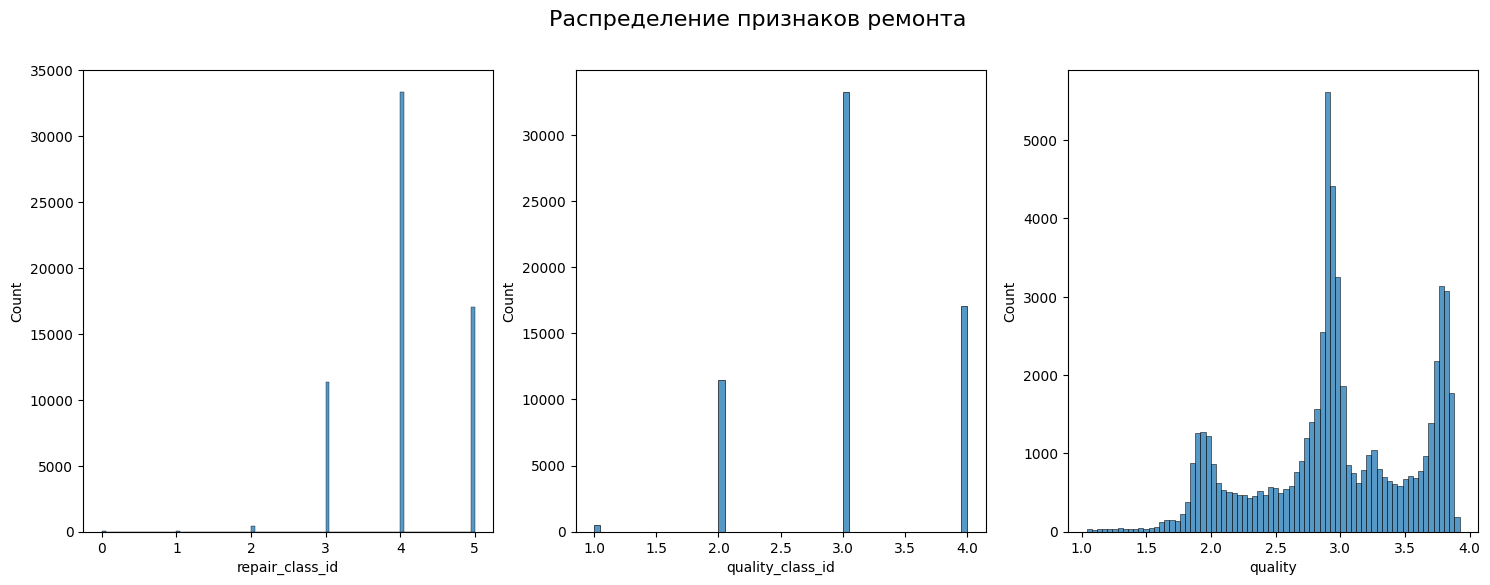

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(flats, x='repair_class_id', ax=axs[0])
sns.histplot(flats, x='quality_class_id', ax=axs[1])
sns.histplot(flats, x='quality', ax=axs[2])
fig.suptitle('Распределение признаков ремонта', fontsize=16)
plt.show()

Учитывая распределение можем заполнить пропущенные значения средним. Для объектов это будет так же самая частотная оценка по модели.

### Балконы и лоджии

In [14]:
flats[['loggias', 'balconies']].value_counts(dropna=False).reset_index().sort_values('loggias')

,loggias,balconies,count
24,0.0,NaN,1
6,0.0,0.0,946
22,0.0,4.0,1
20,0.0,3.0,3
9,0.0,1.0,450
12,0.0,2.0,51
3,1.0,NaN,8723
18,1.0,2.0,5
28,1.0,3.0,1
8,1.0,0.0,576


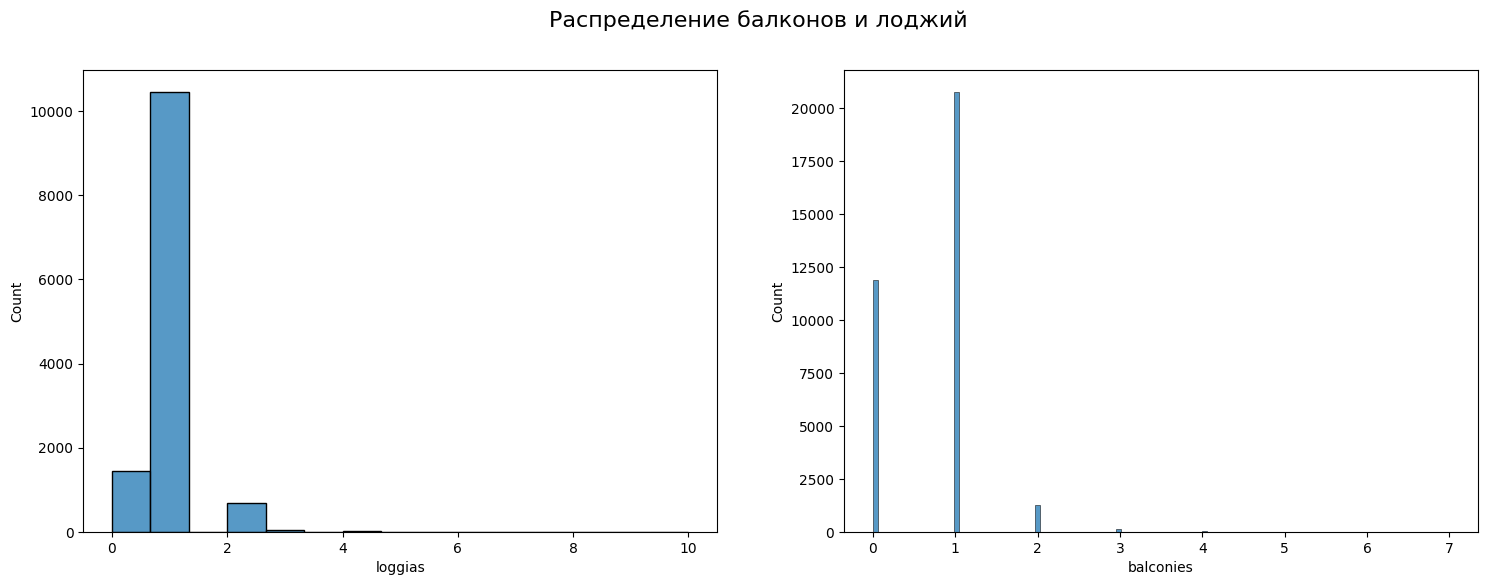

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(flats, x='loggias', ax=axs[0])
sns.histplot(flats, x='balconies', ax=axs[1])
fig.suptitle('Распределение балконов и лоджий', fontsize=16)
plt.show()

Много пропущенных значений встречается для этих признаков. При этом мы знаем, что в доме обычно есть либо балкон, либо лоджия. Поэтому попробуем при известном кол-ве балконов и неизвестном кол-ве лоджий, проставлять 0 в лоджиях и наоборот.

### Жилая площадь и площадь кухни

У нас нет пропусков в общей площади квратиры, поэтому можем находить площади через отношение к общей.

In [16]:
flats['living_by_total_area'] = (flats['living_area'] / flats['area_total']).round(2)
flats['kitchen_by_total_area'] = (flats['kitchen_area'] / flats['area_total']).round(2)

print(f'Процент площади кухни от общей: {flats['kitchen_by_total_area'].mean()}')
print(f'Процент жилой площади от общей: {flats['living_by_total_area'].mean()}')

Процент площади кухни от общей: 0.20105434464035044
Процент жилой площади от общей: 0.5806322728679912


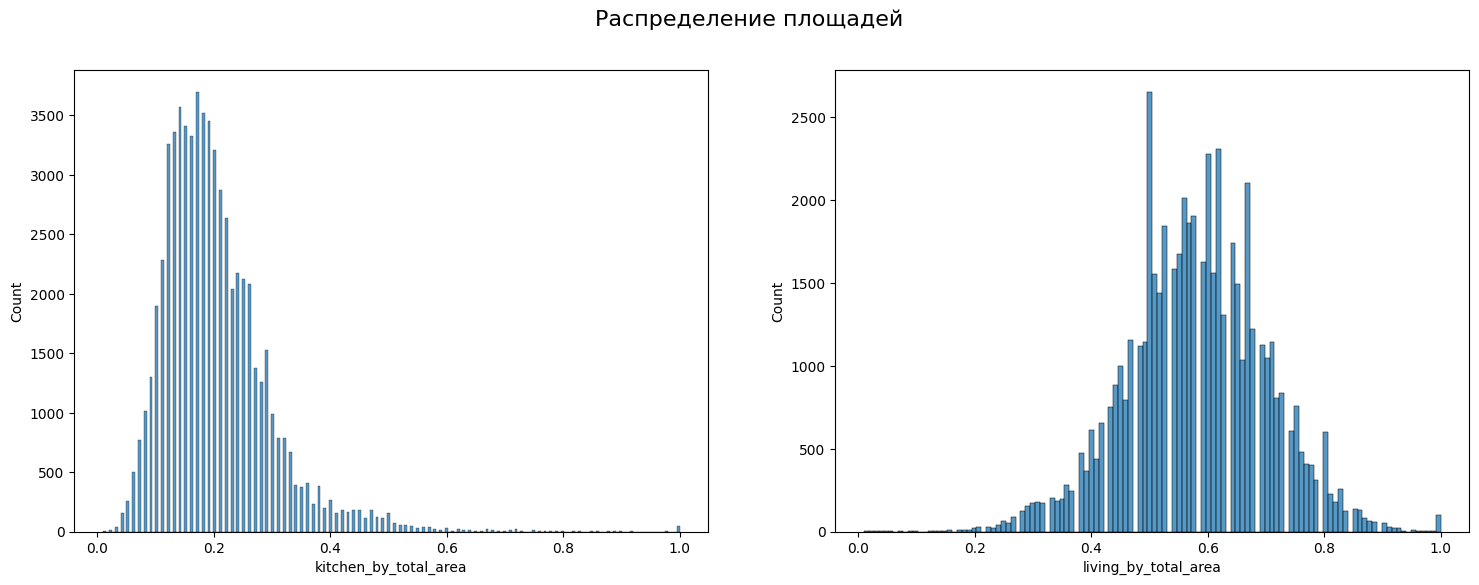

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(flats, x='kitchen_by_total_area', ax=axs[0])
sns.histplot(flats, x='living_by_total_area', ax=axs[1])
fig.suptitle('Распределение площадей', fontsize=16)
plt.show()

Будем заменять пропущенные значения на среднее отношение к общей площади.

### Год постройки

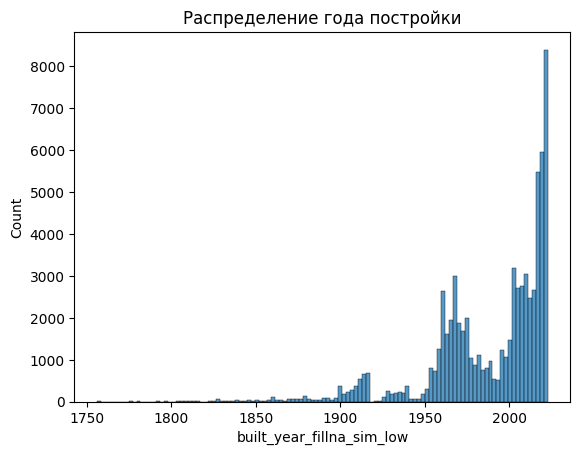

In [18]:
sns.histplot(flats, x='built_year_fillna_sim_low')
plt.title('Распределение года постройки')
plt.show()

В случаи года постройки мы можем использовать признак, где пропущенные значения почти полностью уже были заполнены - built_year_fillna_sim_low.

Здесь у нас всего 7 null-ов, можем заполнить их медианой (здесь учитываем, что есть значения очень ранних годов).

In [19]:
flats['built_year_fillna_sim_low'].median()

2002.0

### Подъезды, лифты, этажи

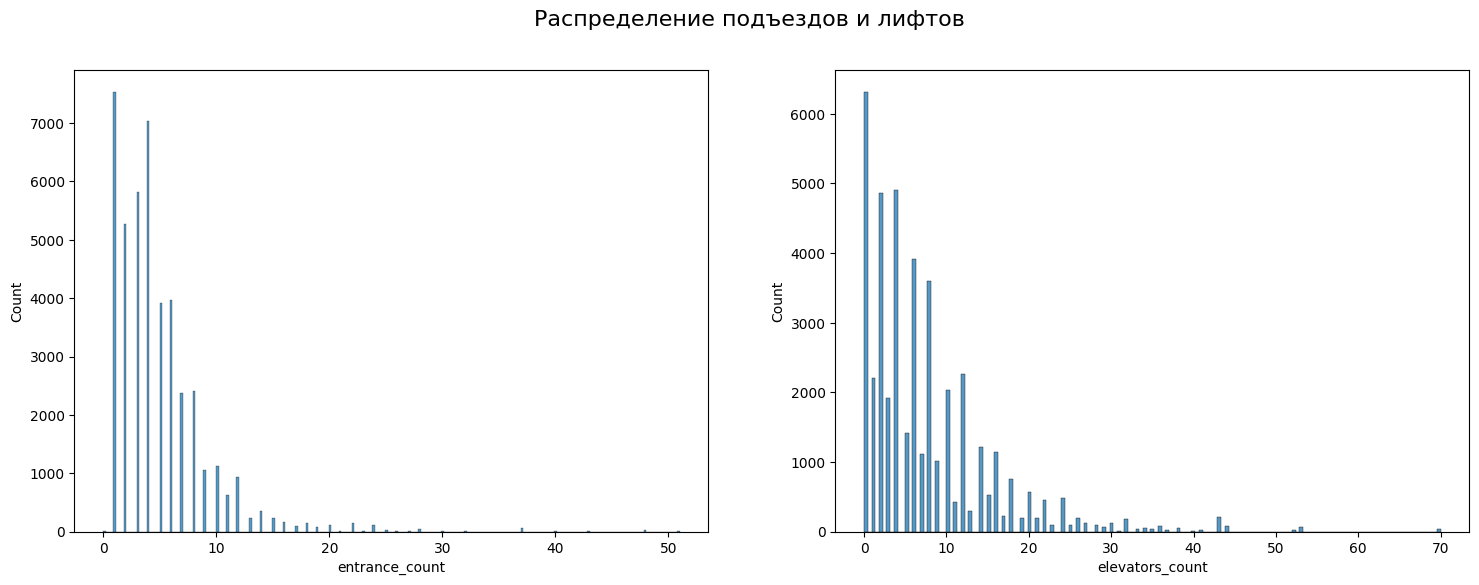

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(flats, x='entrance_count', ax=axs[0])
sns.histplot(flats, x='elevators_count', ax=axs[1])
fig.suptitle('Распределение подъездов и лифтов', fontsize=16)
plt.show()

In [21]:
print(f'Среднее значение подъездов {flats['entrance_count'].mean().round()} и лифтов {flats['elevators_count'].mean().round()}')
print(f'Медианное значение подъездов {flats['entrance_count'].median().round()} и лифтов {flats['elevators_count'].median().round()}')
print(f'Мода подъездов {flats['entrance_count'].mode()[0]} и лифтов {flats['elevators_count'].mode()[0]}')

Среднее значение подъездов 5.0 и лифтов 7.0
Медианное значение подъездов 4.0 и лифтов 6.0
Мода подъездов 1.0 и лифтов 0.0


Можем попробовать брать моду/медиану/среднее для подъездов и лифтов. Для этажей можем просто брать моду учитывая малое количество выбросов (всего 7).

### Материал стен

In [22]:
objects[['wall_material_fillna_sim_low']].value_counts(dropna=False).reset_index().sort_values('wall_material_fillna_sim_low')

,wall_material_fillna_sim_low,count
2,1.0,15276
0,2.0,18362
3,3.0,11
1,4.0,15795
4,NaN,7


В wall_material_fillna_sim_low кол-во пропусков равно 7, можем просто взять моду.

### Высота потолков

In [23]:
objects[['ceiling_height_fillna_own']].value_counts(dropna=False).reset_index().sort_values('ceiling_height_fillna_own')


,ceiling_height_fillna_own,count
0,2.0,32259
1,3.0,16354
3,4.0,277
5,5.0,2
4,6.0,7
6,10.0,2
2,NaN,550


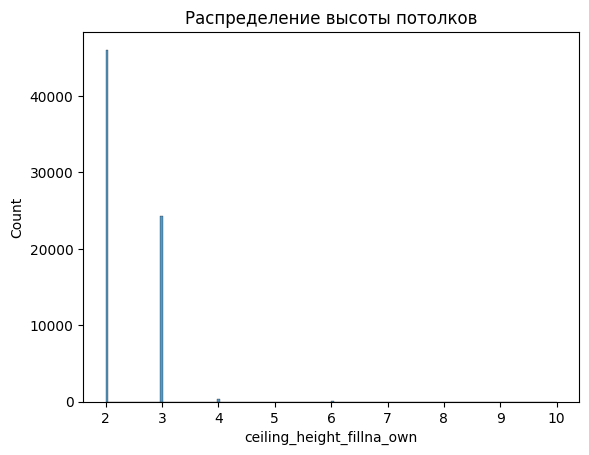

In [24]:
sns.histplot(flats, x='ceiling_height_fillna_own')
plt.title('Распределение высоты потолков')
plt.show()

Пропусков здесь около 1%. Можем взять моду, учитывая распределение.

### Класс дома

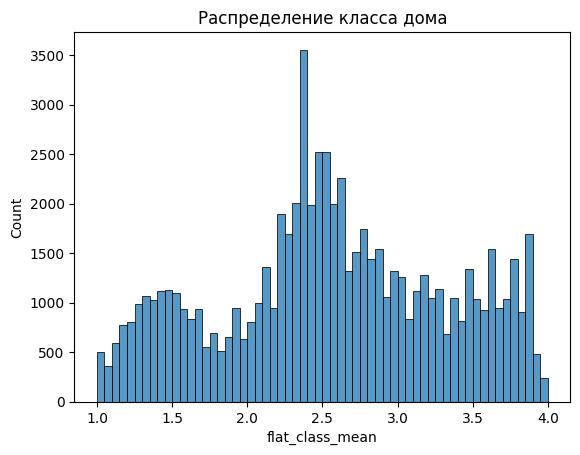

In [25]:
sns.histplot(flats, x='flat_class_mean')
plt.title('Распределение класса дома')
plt.show()

Здесь пропусков очень мало. Учитывая распределение можем просто взять среднее.

### Доля апартаментов

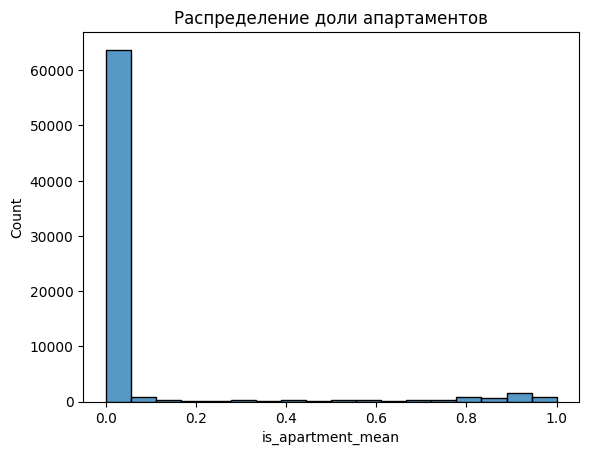

In [26]:
sns.histplot(flats, x='is_apartment_mean')
plt.title('Распределение доли апартаментов')
plt.show()

Здесь важно учитывать тип здания (его стен). В зависимочти от wall_material_fillna_sim_low будем определять долю апартаментов.

In [27]:
flats['is_apartment_mean_round'] = flats['is_apartment_mean'].round(1)
flats[['wall_material_fillna_sim_low', 'is_apartment_mean_round']].value_counts(dropna=False).reset_index().sort_values('wall_material_fillna_sim_low')


,wall_material_fillna_sim_low,is_apartment_mean_round,count
38,1.0,0.7,1
25,1.0,0.9,86
20,1.0,NaN,149
29,1.0,1.0,50
30,1.0,0.3,40
28,1.0,0.8,58
32,1.0,0.4,33
33,1.0,0.5,17
35,1.0,0.6,11
1,1.0,0.0,21461


Например, для типа стен 3 вообще нет апартаментов.

Будем брать либо среднее в зависимости от типа стен. Или брать 0 для всех. Попробуем оба варианта.

### Доступная мебель и инфраструктура

В случае инфраструктуры у нас почти везде пропуски, этот признак мы скорее всего не будем использовать так как информация об инфраструктуре заложена в аналоги. Распарсим словари на отдельные поля (по наличию значения).

In [28]:
flats[['amenities']].value_counts(dropna=False).reset_index().sort_values('amenities')

,amenities,count
1,[],2238
888,"[{'display_name': 'Интернет'}, {'display_name'...",1
303,"[{'display_name': 'Интернет'}, {'display_name'...",2
889,"[{'display_name': 'Интернет'}, {'display_name'...",1
778,"[{'display_name': 'Интернет'}, {'display_name'...",1
...,...,...
447,"[{'display_name': 'Холодильник'}, {'display_na...",1
446,"[{'display_name': 'Холодильник'}, {'display_na...",1
444,"[{'display_name': 'Холодильник'}, {'display_na...",1
357,[{'display_name': 'Холодильник'}],2


In [29]:
# Уникальная мебель
flats[flats['amenities'].notnull()]['amenities'].str.split("'").explode().unique()

array(['[{', 'display_name', ': ', 'Мебель на кухне', '}, {',
       'Мебель в комнатах', 'Стиральная машина', 'Плита', 'Холодильник',
       'Посудомоечная машина', 'Телевизор', '}]', 'Кондиционер',
       'Микроволновая печь', 'Интернет', '[]', 'Мебельнакухне',
       'Мебельвкомнатах', 'Стиральнаямашина', 'Микроволноваяпечь'],
      dtype=object)

In [30]:
flats['kitchen_furniture'] = flats['amenities'].str.contains('Мебель на кухне|Мебельнакухне').fillna(0).astype(int)
flats['furniture_in_rooms'] = flats['amenities'].str.contains('Мебель в комнатах|Мебельвкомнатах').fillna(0).astype(int)
flats['washing_machine'] = flats['amenities'].str.contains('Стиральная машина|Стиральнаямашина').fillna(0).astype(int)
flats['stove'] = flats['amenities'].str.contains('Плита').fillna(0).astype(int)
flats['refrigerator'] = flats['amenities'].str.contains('Холодильник').fillna(0).astype(int)
flats['dishwasher'] = flats['amenities'].str.contains('Посудомоечная машина|Посудомоечнаямашина').fillna(0).astype(int)
flats['TV'] = flats['amenities'].str.contains('Телевизор').fillna(0).astype(int)
flats['air_conditioner'] = flats['amenities'].str.contains('Кондиционер').fillna(0).astype(int)
flats['microwave'] = flats['amenities'].str.contains('Микроволновая печь|Микроволноваяпечь').fillna(0).astype(int)
flats['internet'] = flats['amenities'].str.contains('Интернет').fillna(0).astype(int)
                                          
flats['kitchen_furniture'].sum()

6887

In [31]:
# Уникальная инфраструктура

flats[flats['infrastructure'].notnull()]['infrastructure'].str.split("'").explode().unique()

array(['[{', 'display_name', ': ', 'Школа', '}, {', 'Детский сад',
       'Торговый центр', 'Парк', '}]', 'Фитнес', '[]', 'Детскийсад'],
      dtype=object)

In [32]:
flats['school'] = flats['infrastructure'].str.contains('Школа').fillna(0).astype(int)
flats['kindergarten'] = flats['infrastructure'].str.contains('Детский сад|Детскийсад').fillna(0).astype(int)
flats['shopping_Center'] = flats['infrastructure'].str.contains('Торговый центр|Торговыйцентр').fillna(0).astype(int)
flats['park'] = flats['infrastructure'].str.contains('Парк').fillna(0).astype(int)
flats['fitness'] = flats['amenities'].str.contains('Фитнес').fillna(0).astype(int)
flats['school'].sum()

5416

### Процент комиссии

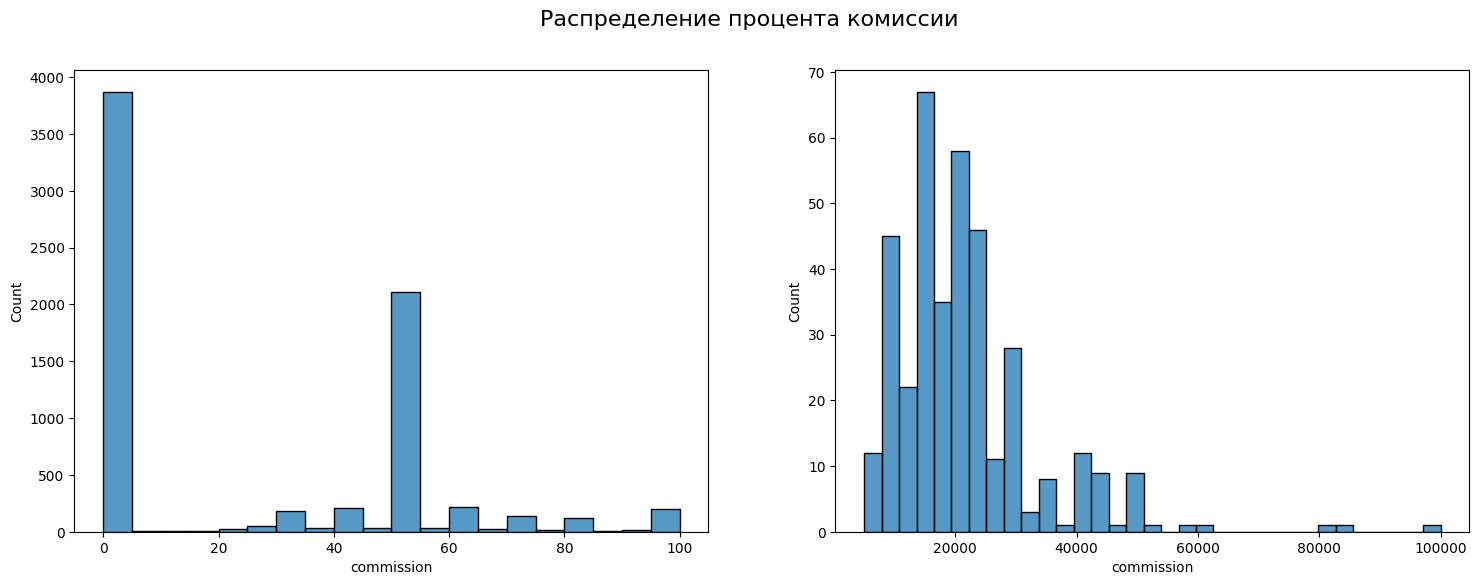

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(flats[flats['commission'] <= 100], x='commission', ax=axs[0])
sns.histplot(flats[flats['commission'] > 100], x='commission', ax=axs[1])
fig.suptitle('Распределение процента комиссии', fontsize=16)
plt.show()

Здесь неправильный признак

### Размер депозита

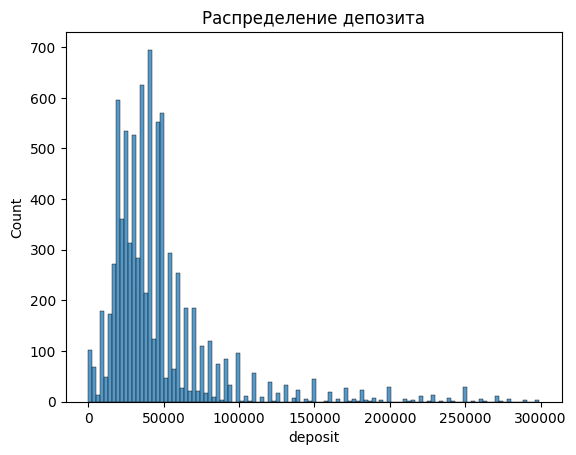

In [34]:
sns.histplot(flats[flats['deposit']<300000], x='deposit')
plt.title('Распределение депозита')
plt.show()

In [35]:
flats['deposit'].mean()

53501.92447272299

Заполним средним, но скорее всего мы не будем использовать этот признак

### Доступен ли торг

In [36]:
flats[['haggle']].value_counts(dropna=False).reset_index().sort_values('haggle')

,haggle,count
1,False,6592
2,True,912
0,NaN,63990


Здесь поставим все значения True - если не указана недоступность торга, значит работает обратное.

### Способ оплаты комунальных

In [37]:
flats[['communal_payments']].value_counts(dropna=False).reset_index().sort_values('communal_payments')

,communal_payments,count
0,NaN,71494


Здесь у нас вообще нет данных, поэтому этот признак использовать мы не будем.

## Обработка выбросов

Посмотрим на все наши данные, чтобы понять в каких из них есть выбросы

In [38]:
flats.columns

Index(['offer_id', 'n_photos', 'source', 'house_guid', 'house_lat',
       'house_lon', 'floor', 'rooms', 'renovation', 'repair_class_id',
       'quality_class_id', 'quality', 'balconies', 'loggias', 'area_total',
       'living_area', 'kitchen_area', 'built_year_fillna_own',
       'built_year_fillna_sim_low', 'entrance_count', 'elevators_count',
       'floors_fillna_own', 'wall_material_fillna_own',
       'wall_material_fillna_sim_low', 'ceiling_height_fillna_own',
       'flat_class_mean', 'is_apartment_mean', 'region', 'amenities',
       'infrastructure', 'commission', 'deposit', 'haggle',
       'communal_payments', 'price', 'living_by_total_area',
       'kitchen_by_total_area', 'is_apartment_mean_round', 'kitchen_furniture',
       'furniture_in_rooms', 'washing_machine', 'stove', 'refrigerator',
       'dishwasher', 'TV', 'air_conditioner', 'microwave', 'internet',
       'school', 'kindergarten', 'shopping_Center', 'park', 'fitness'],
      dtype='object')

In [39]:
# Cоставим список полей для визуализации и исключим те, которые в этом контексте нам не интересно рассматривать
columns = ['n_photos', 'source', 'floor', 'rooms', 'renovation', 'repair_class_id',
       'quality_class_id', 'quality', 'balconies', 'loggias', 'area_total',
       'living_area', 'kitchen_area', 'built_year_fillna_own',
       'built_year_fillna_sim_low', 'entrance_count', 'elevators_count',
       'floors_fillna_own', 'wall_material_fillna_own',
       'wall_material_fillna_sim_low', 'ceiling_height_fillna_own',
       'flat_class_mean', 'is_apartment_mean', 'commission', 'deposit', 'haggle',
       'communal_payments', 'price', 'living_by_total_area',
       'kitchen_by_total_area', 'is_apartment_mean_round', 'kitchen_furniture',
       'furniture_in_rooms', 'washing_machine', 'stove', 'refrigerator',
       'dishwasher', 'TV', 'air_conditioner', 'microwave', 'internet',
       'school', 'kindergarten', 'shopping_Center', 'park', 'fitness']

other_columns = ['offer_id', 'house_guid', 'house_lat', 'house_lon', 'region',
                 'infrastructure', 'amenities']

In [40]:
len(columns)

46

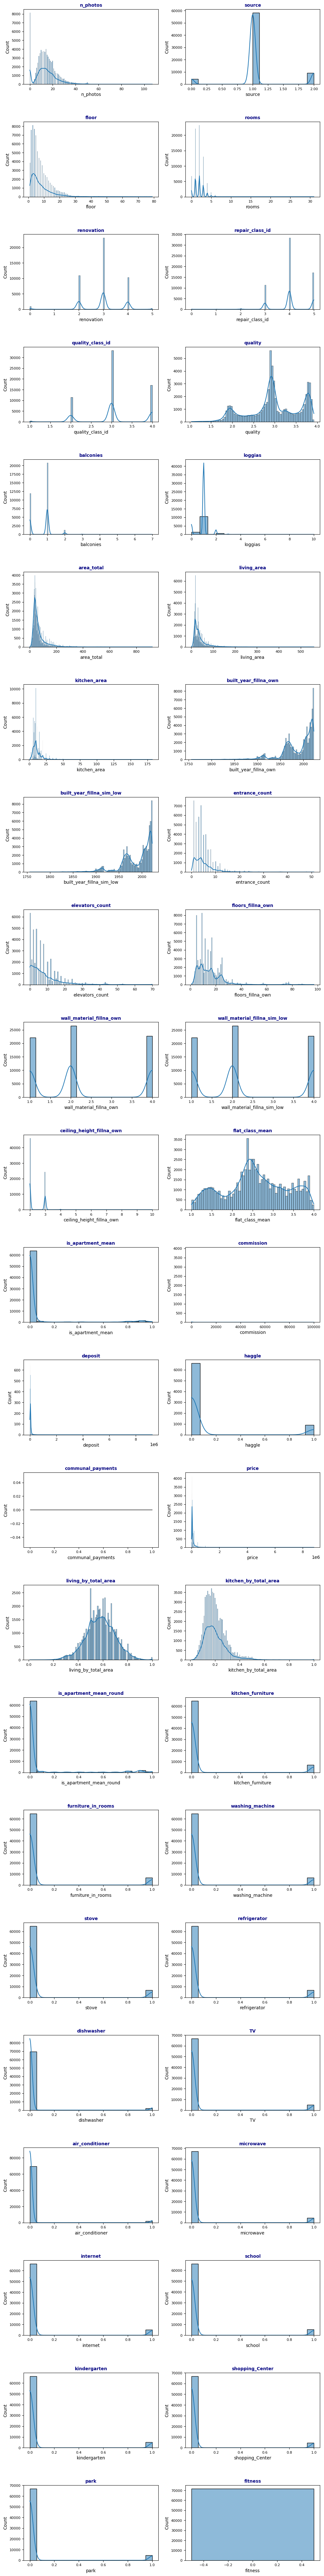

In [41]:
fig, axs = plt.subplots(23, 2, figsize=(12, 104))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.histplot(flats, x=feature, ax=axs[row, col], kde=True)
    axs[row, col].set_title(feature, fontsize=10, fontweight='bold', color='navy')
    axs[row, col].tick_params(axis='x', labelsize=8)
    axs[row, col].tick_params(axis='y', labelsize=8)  

# fig.suptitle('Распределение подъездов и лифтов', fontsize=16)
plt.show()

Отдельно рассмотрим признаки, где могут быть выбросы

### Число комнат

In [42]:
flats[['rooms']].value_counts(dropna=False).reset_index().sort_values('rooms')

,rooms,count
3,0,6651
1,1,22144
0,2,23239
2,3,13029
4,4,4372
5,5,1376
6,6,619
7,7,35
8,8,19
9,9,5


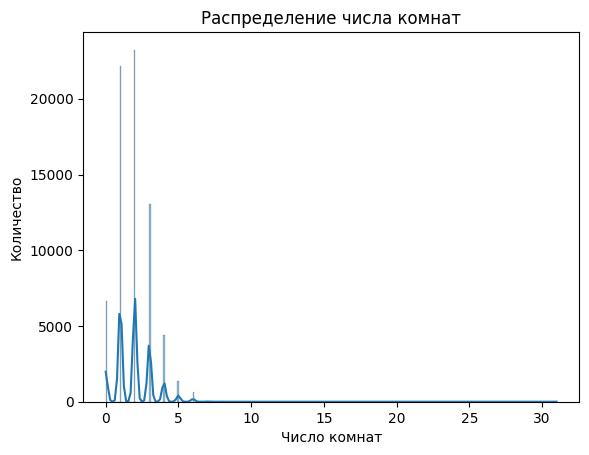

In [49]:
sns.histplot(flats, x='rooms', kde=True)
plt.title('Распределение числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Количество')
plt.show()

In [43]:
flats[flats['rooms'] == 11]['price']

48027    38000.0
Name: price, dtype: float64

Уберем квартиры с числом комнат 11-31. Учитывая цену такого числа комнат быть не может.

### Высота потолков

In [44]:
flats[['ceiling_height_fillna_own']].value_counts(dropna=False).reset_index().sort_values('ceiling_height_fillna_own')

,ceiling_height_fillna_own,count
0,2.0,46055
1,3.0,24234
3,4.0,389
5,5.0,3
4,6.0,14
6,10.0,3
2,NaN,796


Уберем квартиры с высотой потолков 10 метров

## Корреляция признаков

Построим корреляцию Пирсона для числовых признаков 

<Axes: >

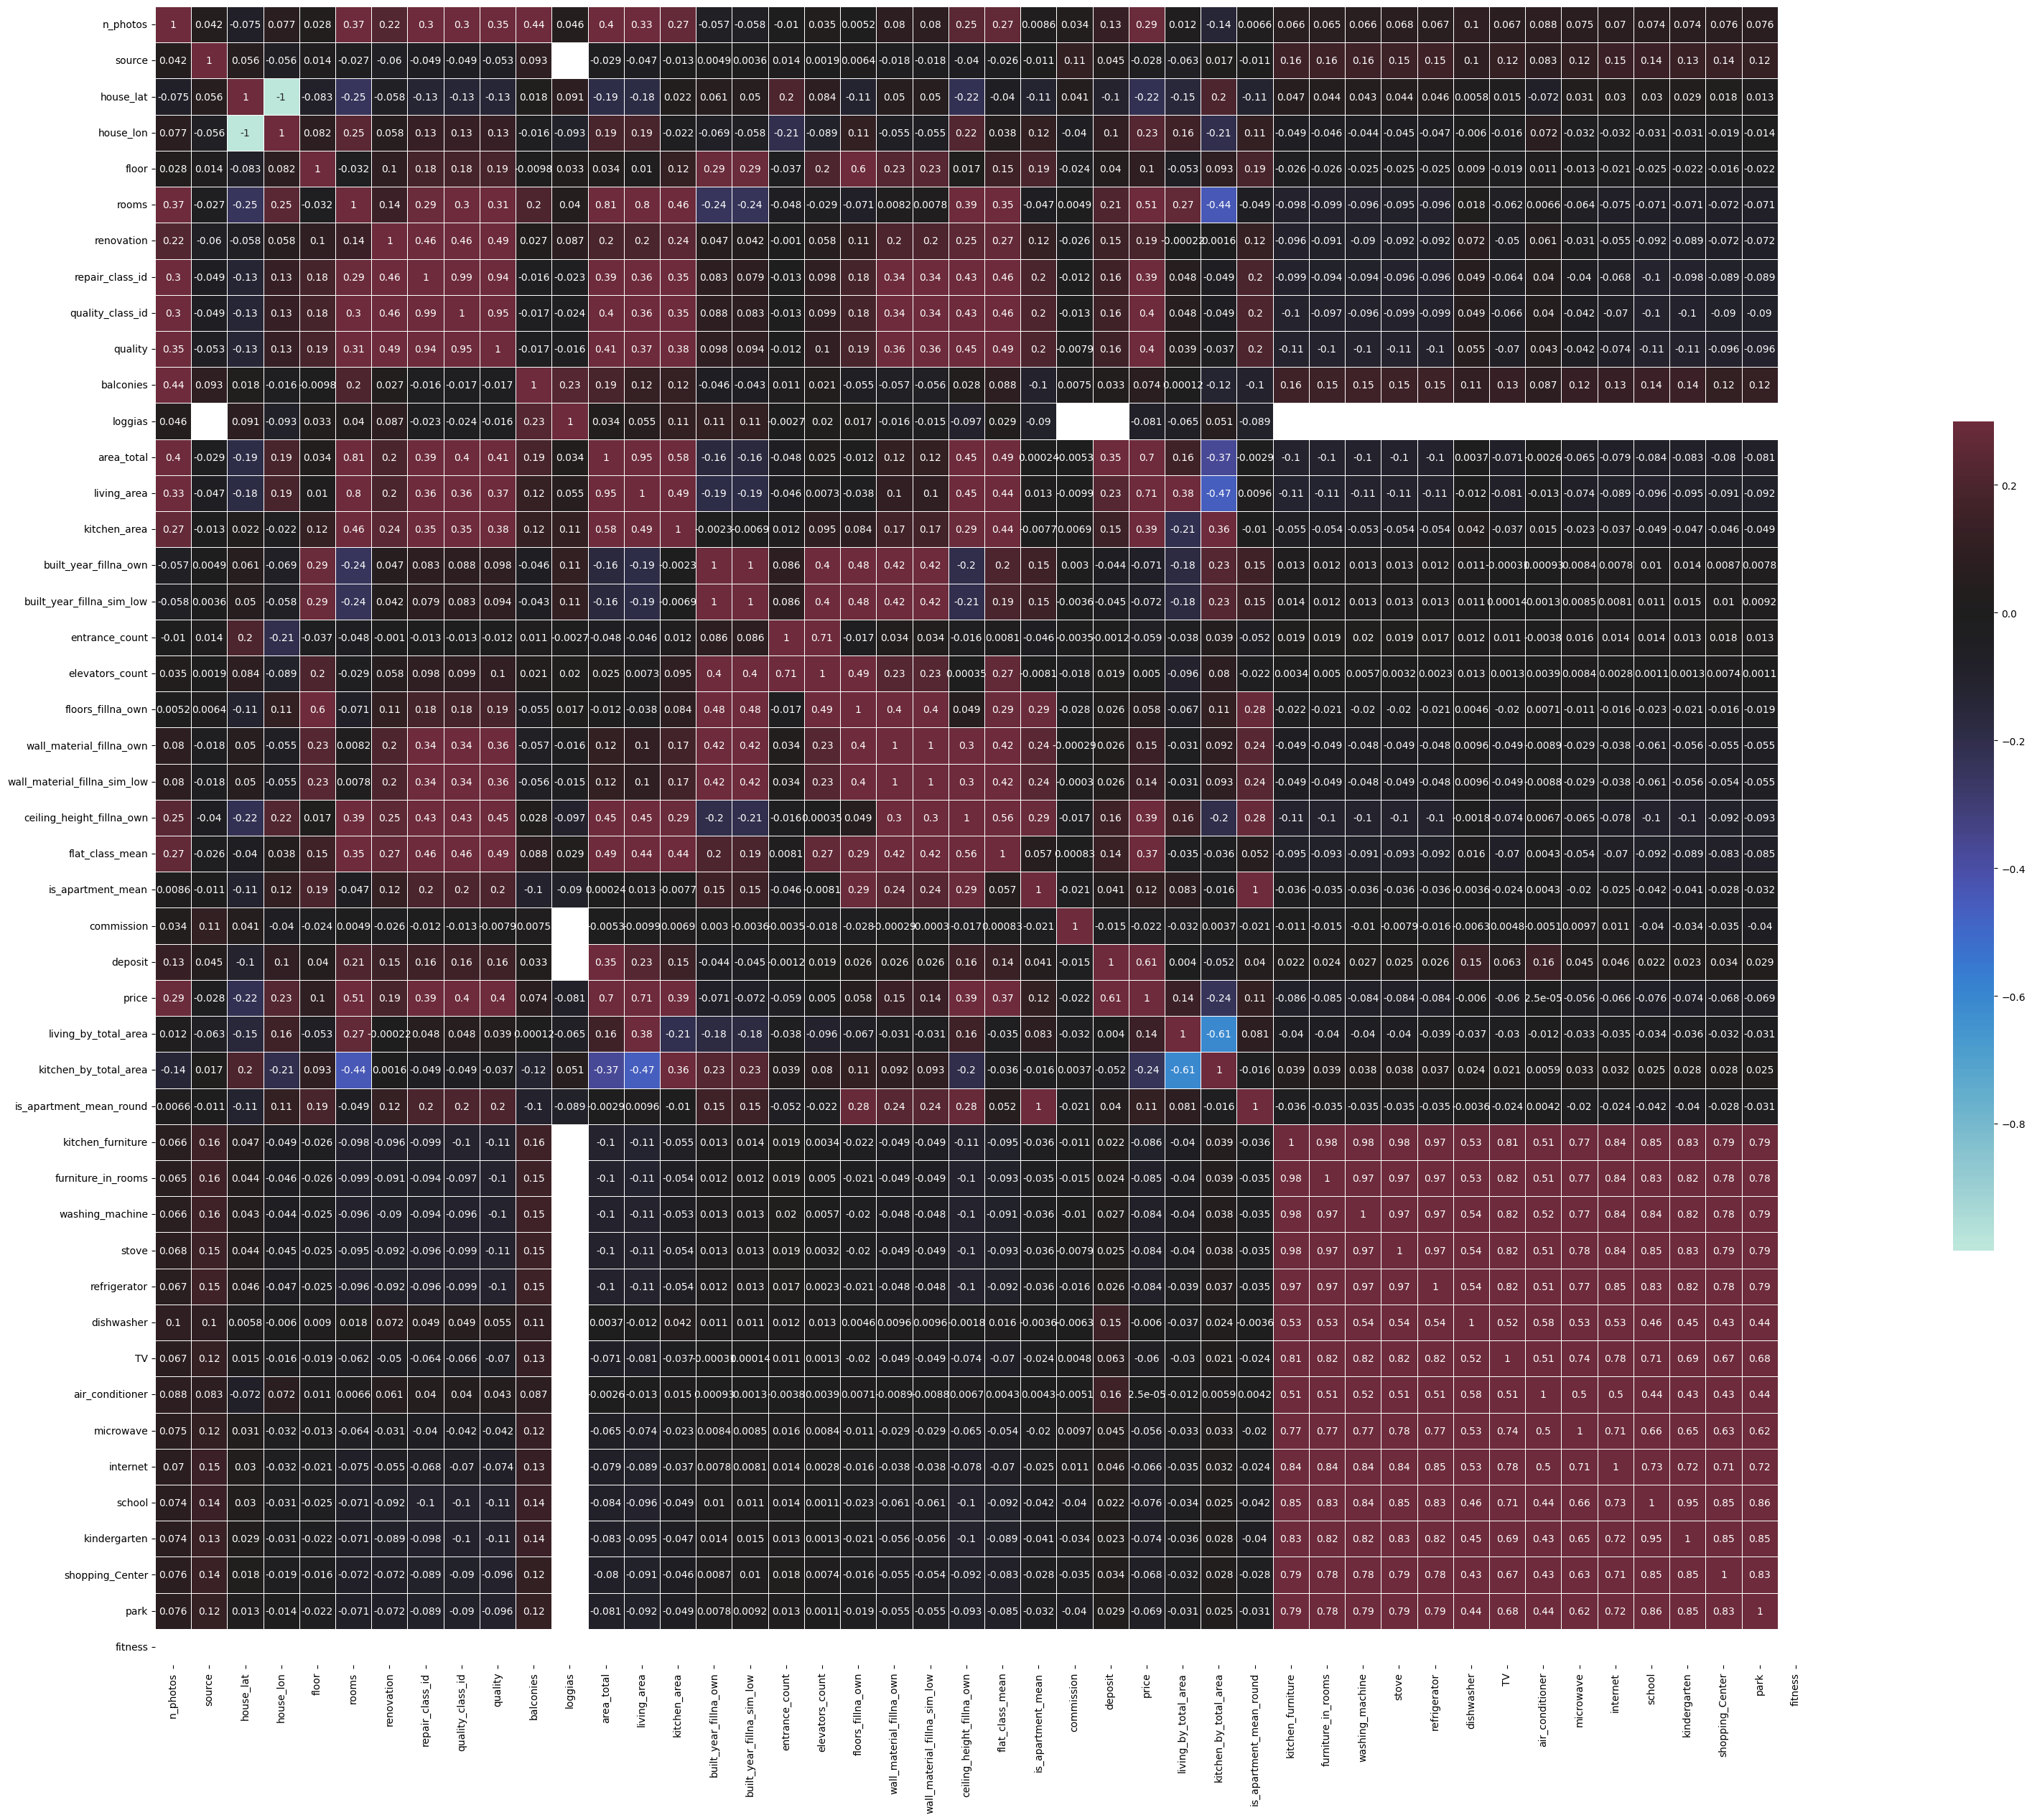

In [45]:
plt.figure(figsize=(50, 30))
flats_numeric = flats.select_dtypes(include=['float64', 'int64'])
corr = flats_numeric.drop(['offer_id', 'communal_payments'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Построение тепловой карты
sns.heatmap(corr, 
            # mask=mask, cmap=cmap, 
            vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)